<a href="https://colab.research.google.com/github/Rafiquekuwari/machine_learning_tasks/blob/main/Machine_Learning_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import uuid

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
#Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Original X_train shape:", X_train.shape)
print("Original y_train shape:", y_train.shape)
print("Original X_test shape:", X_test.shape)
print("Original y_test shape:", y_test.shape)
print("Sample y_train[0]:", y_train[0])



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original X_train shape: (60000, 28, 28)
Original y_train shape: (60000,)
Original X_test shape: (10000, 28, 28)
Original y_test shape: (10000,)
Sample y_train[0]: 5


In [4]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
# Reshape data for ANN (flatten images)
X_train_ann = X_train.reshape(-1, 28 * 28)
X_test_ann = X_test.reshape(-1, 28 * 28)
print("Flattened X_train_ann shape:", X_train_ann.shape)
print("Flattened X_test_ann shape:", X_test_ann.shape)

Flattened X_train_ann shape: (60000, 784)
Flattened X_test_ann shape: (10000, 784)


In [6]:
# Reshape data for CNN (add channel dimension)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)
print("X_train_cnn shape with channel dimension:", X_train_cnn.shape)
print("X_test_cnn shape with channel dimension:", X_test_cnn.shape)

X_train_cnn shape with channel dimension: (60000, 28, 28, 1)
X_test_cnn shape with channel dimension: (10000, 28, 28, 1)


In [7]:
# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
print("Categorical y_train_cat shape:", y_train_cat.shape)
print("Categorical y_test_cat shape:", y_test_cat.shape)

Categorical y_train_cat shape: (60000, 10)
Categorical y_test_cat shape: (10000, 10)


In [8]:
# Build and train ANN model
ann_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

ann_history = ann_model.fit(X_train_ann, y_train_cat,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2,
                          verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7422 - loss: 0.8435 - val_accuracy: 0.9450 - val_loss: 0.1849
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9293 - loss: 0.2382 - val_accuracy: 0.9600 - val_loss: 0.1363
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9474 - loss: 0.1712 - val_accuracy: 0.9668 - val_loss: 0.1126
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9580 - loss: 0.1412 - val_accuracy: 0.9696 - val_loss: 0.0993
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1184 - val_accuracy: 0.9712 - val_loss: 0.0954
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.1043 - val_accuracy: 0.9740 - val_loss: 0.0895
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9723 - loss: 0.0934 - val_accuracy: 0.9743 - val_loss: 0.0887
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9741 - loss: 0.0838 - val_accuracy: 0.

In [9]:
# 3. Build and train CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train_cnn, y_train_cat,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2,
                          verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7204 - loss: 0.8521 - val_accuracy: 0.9743 - val_loss: 0.0886
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9476 - loss: 0.1779 - val_accuracy: 0.9812 - val_loss: 0.0618
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9609 - loss: 0.1319 - val_accuracy: 0.9847 - val_loss: 0.0539
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9680 - loss: 0.1089 - val_accuracy: 0.9856 - val_loss: 0.0510
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9729 - loss: 0.0908 - val_accuracy: 0.9881 - val_loss: 0.0443
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9782 - loss: 0.0744 - val_accuracy: 0.9876 - val_loss: 0.0430
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9800 - loss: 0.0658 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9809 - loss: 0.0625 - val_accuracy: 0.

In [10]:
# Evaluate models
# ANN evaluation
ann_test_loss, ann_test_acc = ann_model.evaluate(X_test_ann, y_test_cat, verbose=0)
ann_pred = ann_model.predict(X_test_ann)
ann_pred_classes = np.argmax(ann_pred, axis=1)

# CNN evaluation
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

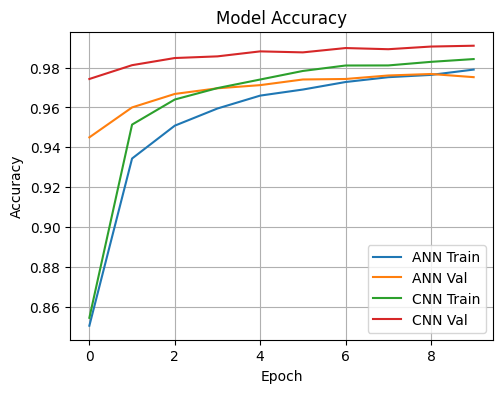

In [11]:
# Visualizations
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='ANN Train')
plt.plot(ann_history.history['val_accuracy'], label='ANN Val')
plt.plot(cnn_history.history['accuracy'], label='CNN Train')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


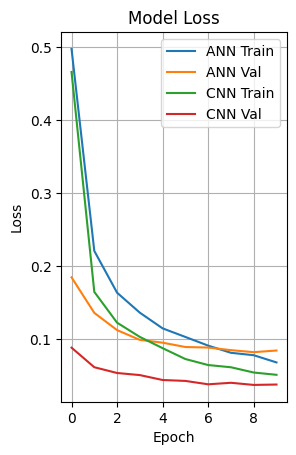

In [12]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='ANN Train')
plt.plot(ann_history.history['val_loss'], label='ANN Val')
plt.plot(cnn_history.history['loss'], label='CNN Train')
plt.plot(cnn_history.history['val_loss'], label='CNN Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)



Text(50.722222222222214, 0.5, 'True')

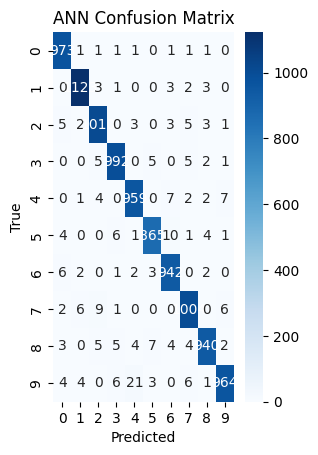

In [13]:
# ANN confusion matrix
plt.subplot(1, 2, 1)
ann_cm = confusion_matrix(y_test, ann_pred_classes)
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


Text(321.26767676767673, 0.5, 'True')

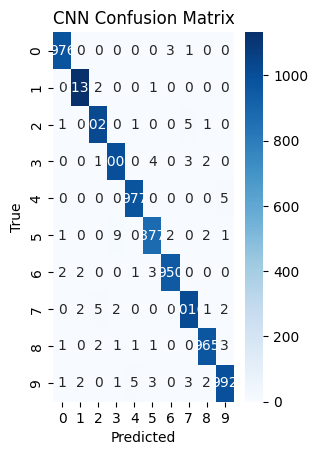

In [14]:
# CNN confusion matrix
plt.subplot(1, 2, 2)
cnn_cm = confusion_matrix(y_test, cnn_pred_classes)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')



In [16]:
#  Summary Report

# ANN Classification Report
{classification_report(y_test, ann_pred_classes)}

# CNN Classification Report
{classification_report(y_test, cnn_pred_classes)}


# Print summary
print(f"ANN Test Accuracy: {ann_test_acc:.4f}, Test Loss: {ann_test_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")


ANN Test Accuracy: 0.9772, Test Loss: 0.0739
CNN Test Accuracy: 0.9909, Test Loss: 0.0287


In [18]:
# Summary Report

print(f"ANN Test Accuracy: {ann_test_acc:.4f}, Test Loss: {ann_test_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")
print("Visualizations saved as 'training_curves.png' and 'confusion_matrices.png'")
print("Detailed report saved as 'model_comparison_report.md'")

ANN Test Accuracy: 0.9772, Test Loss: 0.0739
CNN Test Accuracy: 0.9909, Test Loss: 0.0287
Visualizations saved as 'training_curves.png' and 'confusion_matrices.png'
Detailed report saved as 'model_comparison_report.md'
